<a href="https://colab.research.google.com/github/nevasini/Breast-Cancer-Detection/blob/main/data_visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! unzip -d dataset "/content/drive/MyDrive/master-dataset.zip"

In [ ]:
from glob import glob
import cv2
import sklearn
imagePatches = glob("/content/drive/MyDrive/split-data.zip", recursive=True)
for filename in imagePatches[0:10]:
    print(filename)

/content/drive/MyDrive/split-data.zip


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

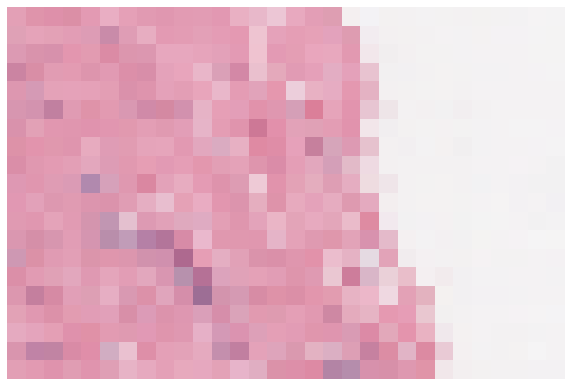

In [ ]:
image_name = "dataset/master-dataset/zero/12894_idx5_x2751_y1501_class0.png"
def plotImage(image_location):
    image = cv2.imread(image_name)
    image = cv2.resize(image, (30,20))

    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)); plt.axis('off')
    return 
plotImage(image_name)

In [ ]:
from glob import glob
imagePatches=glob("/content/dataset/master-dataset/**/*.png")

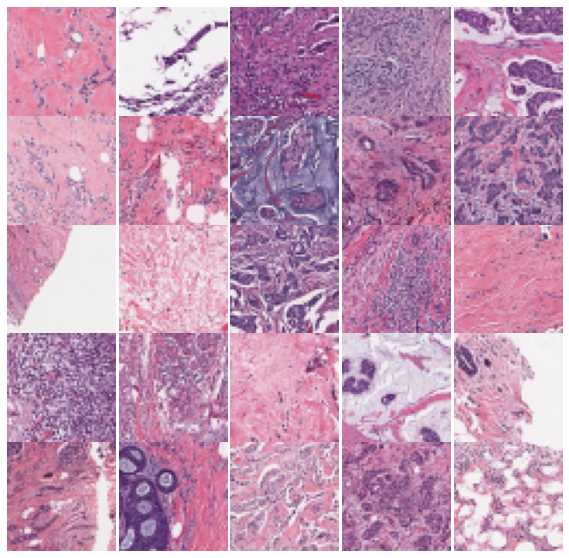

In [ ]:
bunchOfImages = imagePatches
i_ = 0
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.subplots_adjust(wspace=0, hspace=0)
for l in bunchOfImages[:25]:
    im = cv2.imread(l)
    im = cv2.resize(im, (50, 50)) 
    plt.subplot(5, 5, i_+1) #.set_title(l)
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB)); plt.axis('off')
    i_ += 1

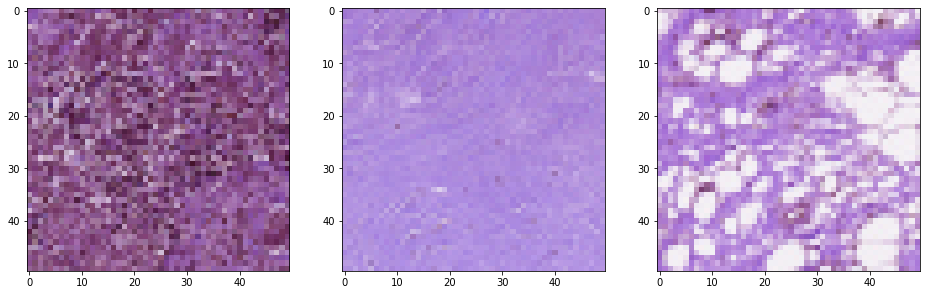

In [ ]:
import random
def randomImages(a):
    r = random.sample(a, 4)
    plt.figure(figsize=(16,16))
    plt.subplot(131)
    plt.imshow(cv2.imread(r[0]))
    plt.subplot(132)
    plt.imshow(cv2.imread(r[1]))
    plt.subplot(133)
    plt.imshow(cv2.imread(r[2])); 
randomImages(imagePatches)

In [ ]:
import fnmatch

In [ ]:
patternZero = '*class0.png'
patternOne = '*class1.png'
classZero = fnmatch.filter(imagePatches, patternZero)
classOne = fnmatch.filter(imagePatches, patternOne)
print("IDC(-)\n\n",classZero[0:5],'\n')
print("IDC(+)\n\n",classOne[0:5])

IDC(-)

 ['/content/dataset/master-dataset/zero/12890_idx5_x551_y101_class0.png', '/content/dataset/master-dataset/zero/10285_idx5_x451_y301_class0.png', '/content/dataset/master-dataset/zero/9078_idx5_x1951_y2151_class0.png', '/content/dataset/master-dataset/zero/16570_idx5_x1401_y651_class0.png', '/content/dataset/master-dataset/zero/9324_idx5_x1851_y1201_class0.png'] 

IDC(+)

 ['/content/dataset/master-dataset/one/14157_idx5_x1851_y1451_class1.png', '/content/dataset/master-dataset/one/10307_idx5_x1401_y1151_class1.png', '/content/dataset/master-dataset/one/10257_idx5_x1651_y1301_class1.png', '/content/dataset/master-dataset/one/9226_idx5_x1951_y2651_class1.png', '/content/dataset/master-dataset/one/10260_idx5_x851_y701_class1.png']


In [ ]:
def proc_images(lowerIndex,upperIndex):
    """
    Returns two arrays: 
        x is an array of resized images
        y is an array of labels
    """ 
    x = []
    y = []
    WIDTH = 50
    HEIGHT = 50
    for img in imagePatches[lowerIndex:upperIndex]:
        full_size_image = cv2.imread(img)
        x.append(cv2.resize(full_size_image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC))
        if img in classZero:
            y.append(0)
        elif img in classOne:
            y.append(1)
        else:
            return
    return x,y

In [ ]:
import numpy as np

In [ ]:
X,Y = proc_images(0,900)
df = pd.DataFrame()
df["images"]=X
df["labels"]=Y
X2=df["images"]
Y2=df["labels"]
X2=np.array(X2)
imgs0=[]
imgs1=[]
imgs0 = X2[Y2==0] # (0 = no IDC, 1 = IDC)
imgs1 = X2[Y2==1] 

In [ ]:
def describeData(a,b):
    print('Total number of images: {}'.format(len(a)))
    print('Number of IDC(-) Images: {}'.format(np.sum(b==0)))
    print('Number of IDC(+) Images: {}'.format(np.sum(b==1)))
    print('Percentage of positive images: {:.2f}%'.format(100*np.mean(b)))
    print('Image shape (Width, Height, Channels): {}'.format(a[0].shape))
describeData(X2,Y2)

Total number of images: 900
Number of IDC(-) Images: 0
Number of IDC(+) Images: 900
Percentage of positive images: 100.00%
Image shape (Width, Height, Channels): (50, 50, 3)


In [ ]:
dict_characters = {0: 'IDC(-)', 1: 'IDC(+)'}
print(df.head(10))
print("")
print(dict_characters)

                                              images  labels
0  [[[166, 133, 222], [170, 138, 222], [170, 136,...       1
1  [[[241, 243, 241], [242, 241, 245], [243, 242,...       1
2  [[[152, 95, 160], [149, 93, 155], [160, 103, 1...       1
3  [[[152, 110, 146], [160, 121, 158], [200, 171,...       1
4  [[[215, 189, 220], [219, 203, 222], [215, 190,...       1
5  [[[193, 170, 230], [205, 188, 233], [208, 191,...       1
6  [[[141, 111, 195], [158, 124, 193], [134, 98, ...       1
7  [[[154, 106, 141], [147, 101, 112], [168, 132,...       1
8  [[[171, 141, 186], [173, 137, 167], [198, 169,...       1
9  [[[151, 108, 160], [173, 138, 189], [183, 142,...       1

{0: 'IDC(-)', 1: 'IDC(+)'}


IndexError: ignored

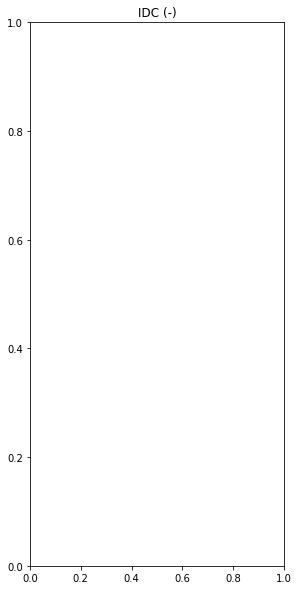

In [ ]:
def plotOne(a,b):
    """
    Plot one numpy array
    """
    plt.subplot(1,2,1)
    plt.title('IDC (-)')
    plt.imshow(a[0])
    plt.subplot(1,2,2)
    plt.title('IDC (+)')
    plt.imshow(b[0])
plotOne(imgs0, imgs1) 

IndexError: ignored

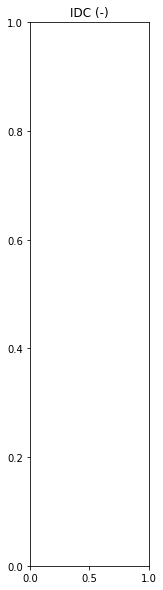

In [ ]:
def plotTwo(a,b): 
    """
    Plot a bunch of numpy arrays sorted by label
    """
    for row in range(3):
        plt.figure(figsize=(20, 10))
        for col in range(3):
            plt.subplot(1,8,col+1)
            plt.title('IDC (-)')
            plt.imshow(a[0+row+col])
            plt.axis('off')       
            plt.subplot(1,8,col+4)
            plt.title('IDC (+)')
            plt.imshow(b[0+row+col])
            plt.axis('off')
plotTwo(imgs0, imgs1) 

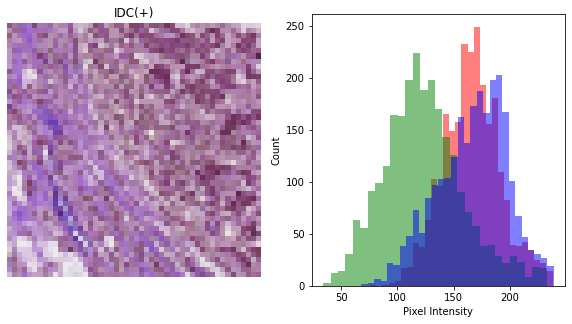

In [ ]:
def plotHistogram(a):
    """
    Plot histogram of RGB Pixel Intensities
    """
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.imshow(a)
    plt.axis('off')
    plt.title('IDC(+)' if Y[1] else 'IDC(-)')
    histo = plt.subplot(1,2,2)
    histo.set_ylabel('Count')
    histo.set_xlabel('Pixel Intensity')
    n_bins = 30
    plt.hist(a[:,:,0].flatten(), bins= n_bins, lw = 0, color='r', alpha=0.5);
    plt.hist(a[:,:,1].flatten(), bins= n_bins, lw = 0, color='g', alpha=0.5);
    plt.hist(a[:,:,2].flatten(), bins= n_bins, lw = 0, color='b', alpha=0.5);
plotHistogram(X2[100])

In [ ]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedKFold, learning_curve, GridSearchCV
from keras.utils.np_utils import to_categorical

In [ ]:
X=np.array(X)   #ASK PRATEEK
X=X/255.0

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Reduce Sample Size for DeBugging
X_train = X_train[0:300000] 
Y_train = Y_train[0:300000]
X_test = X_test[0:300000] 
Y_test = Y_test[0:300000]

print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)

Training Data Shape: (720, 50, 50, 3)
Testing Data Shape: (180, 50, 50, 3)


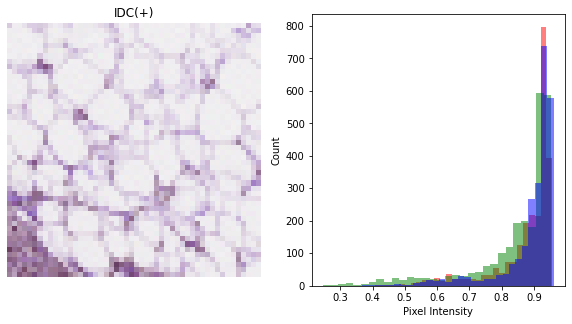

In [ ]:
plotHistogram(X_train[100])

In [ ]:
Y_trainHot = to_categorical(Y_train, num_classes = 2)
Y_testHot = to_categorical(Y_test, num_classes = 2)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


{0: 'IDC(-)', 1: 'IDC(+)'}


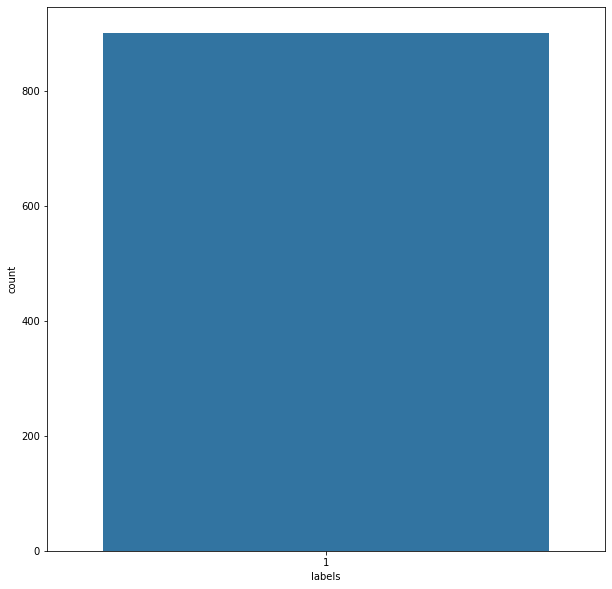

In [ ]:
import seaborn as sns
lab = df['labels']
dist = lab.value_counts()
sns.countplot(lab)
print(dict_characters)
